# Classification with softmax in PyTorch

Welcome to the `03_softmax_classification` notebook. This entry in the portfolio aims to demonstrate core principles and methodologies in PyTorch, specifically focusing on softmax classification — a crucial technique for categorizing data into multiple classes.

In this notebook, I'll delve into key areas such as generating synthetic datasets, constructing and training a softmax classification model, and assessing its performance. Additionally, I'll look at optimization strategies and best practices to enhance model precision and effectiveness.

By engaging with various exercises, this notebook showcases practical uses of softmax classification in PyTorch, laying the groundwork for more complex and sophisticated projects.

## Table of contents

1. [Understanding softmax classifiication](#understanding-softmax-classification)
2. [Setting up the environment](#setting-up-the-environment)
3. [Generating synthetic data](#generating-synthetic-data)
4. [Defining the softmax classification model](#defining-the-softmax-classification-model)
5. [Loss function and optimizer](#loss-function-and-optimizer)
6. [Training the softmax classification model](#training-the-softmax-classification-model)
7. [Evaluating the model](#evaluating-the-model)
8. [Saving and loading the model](#saving-and-loading-the-model)
9. [Optimizations](#optimizations)
10. [Handling real-world data](#handling-real-world-data)
11. [Conclusion](#conclusion)
12. [Further exercises](#further-exercises)

## Understanding softmax classification

Softmax classification is a critical method in machine learning and data analysis, primarily used for categorizing input data into multiple classes. Unlike linear regression, which predicts a continuous output, softmax classification aims to assign probabilities to each class, allowing the model to classify input data into the most likely category.

### Key concepts

#### 1. Binary vs. multiclass classification
- **Binary classification**: Involves two possible output classes. The model predicts which of the two classes the input data belongs to.
- **Multiclass classification**: Involves more than two output classes. The model assigns a probability to each class and classifies the input data based on the highest probability.

#### 2. The softmax function
The softmax function is a generalization of the logistic function that squashes the outputs of each class into a range between 0 and 1, representing probabilities, and ensures that the sum of all probabilities equals 1. It is defined as:

$$ \text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}} $$

where $ z_i $ is the raw output (logits) of the model for class $ i $, and $ K $ is the total number of classes.

#### 3. Model parameters
Softmax classification models consist of weights (coefficients) and biases. The weights represent the relationship between each input feature and each class, while the biases account for the base probability of each class when all input features are zero.

#### 4. Assumptions of softmax classification
For softmax classification to be effective, several assumptions should be considered:
- **Independence of input features**: The features should be independent of each other.
- **Adequate data representation**: The input data should adequately represent all classes to avoid bias in classification.
- **No multicollinearity**: Features should not be highly correlated, as this can lead to redundancy and affect model performance.

#### 5. Model evaluation
Evaluating the performance of a softmax classification model involves various metrics, including:
- **Accuracy**: The proportion of correctly predicted instances out of the total instances.
- **Precision, recall, and F1 score**: Metrics that provide insights into the performance of the model for each class, particularly in cases of imbalanced datasets.
- **Confusion matrix**: A table that shows the true positive, false positive, true negative, and false negative predictions, helping to visualize the performance of the classification model.

#### 6. Overfitting and underfitting
- **Overfitting**: Occurs when the model learns the noise and specific details of the training data, leading to poor performance on new, unseen data. This usually happens when the model is too complex.
- **Underfitting**: Happens when the model is too simple to capture the underlying patterns in the data, resulting in poor performance on both training and new data.

#### 7. Regularization
Regularization techniques help prevent overfitting by adding a penalty to the model's complexity. Common methods include:
- **L2 regularization (Ridge)**: Adds a penalty proportional to the square of the coefficients, discouraging large coefficients and thus, reducing model complexity.
- **L1 regularization (Lasso)**: Adds a penalty proportional to the absolute value of the coefficients, which can lead to sparsity in the model, meaning some coefficients may be exactly zero, simplifying the model.

### Applications

#### Economics and finance
- **Fraud detection**: Identifying fraudulent transactions based on patterns in transaction data.
- **Loan approval**: Classifying loan applications as approved or rejected based on applicant data.
- **Credit scoring**: Categorizing the creditworthiness of borrowers into different risk categories.
- **Market segmentation**: Classifying market data into different segments for targeted marketing strategies.

#### Healthcare
- **Disease diagnosis**: Classifying medical images or patient data into disease categories.
- **Patient triage**: Prioritizing patient treatment based on the severity of their condition.
- **Genomic classification**: Categorizing genetic sequences to identify disease risk factors.
- **Medical image analysis**: Classifying types of abnormalities in medical images like MRIs or X-rays.

#### Marketing and sales
- **Customer segmentation**: Classifying customers into different groups based on purchasing behavior.
- **Churn prediction**: Identifying customers likely to stop using a service based on usage patterns.
- **Product recommendation**: Recommending products to customers based on their purchase history.
- **Sentiment analysis**: Classifying customer reviews or feedback as positive, negative, or neutral.

#### Environmental science
- **Species classification**: Identifying species of plants or animals from images or environmental data.
- **Land cover classification**: Classifying satellite images into categories such as forest, urban, or water bodies.
- **Weather event classification**: Categorizing weather events (e.g., storms, hurricanes) based on meteorological data.
- **Pollution source identification**: Classifying sources of pollution based on environmental monitoring data.

#### Real estate
- **Property type classification**: Categorizing properties into types such as residential, commercial, or industrial.
- **Market value prediction**: Classifying properties into value ranges based on features.
- **Rental property classification**: Identifying suitable rental properties for different demographics.
- **Neighborhood classification**: Classifying neighborhoods based on crime rates, amenities, and other factors.

#### Social sciences
- **Survey response classification**: Categorizing survey responses into themes or sentiment categories.
- **Demographic segmentation**: Classifying populations into demographic segments for research.
- **Behavior prediction**: Predicting social behaviors based on demographic data.
- **Policy impact analysis**: Classifying regions or populations based on the impact of public policies.

#### Engineering and manufacturing
- **Defect detection**: Identifying defects in manufactured products using image data.
- **Equipment maintenance**: Classifying equipment status to predict maintenance needs.
- **Production optimization**: Classifying production processes to identify areas for optimization.
- **Material classification**: Categorizing materials based on their properties for quality control.

#### Sports and performance analysis
- **Player classification**: Categorizing players based on performance metrics and statistics.
- **Game strategy prediction**: Predicting likely strategies of opponents based on past games.
- **Injury risk assessment**: Classifying players into risk categories for potential injuries.
- **Talent identification**: Identifying potential talent in athletes based on performance data.

#### Agriculture
- **Crop disease detection**: Identifying diseases in crops using image data.
- **Soil quality classification**: Categorizing soil samples based on nutrient content and other factors.
- **Livestock breed classification**: Identifying breeds of livestock from image data.
- **Agricultural yield classification**: Predicting yield categories based on weather and soil conditions.

#### Transportation and logistics
- **Vehicle type classification**: Categorizing vehicles based on sensor data.
- **Traffic flow prediction**: Classifying traffic patterns to predict congestion.
- **Route optimization**: Classifying routes based on efficiency and traffic conditions.
- **Demand classification**: Categorizing areas based on transportation demand for better service planning.

#### Insurance
- **Claim risk assessment**: Classifying insurance claims into risk categories based on claim history.
- **Policy classification**: Categorizing insurance policies based on customer needs and risk.
- **Customer segmentation**: Classifying insurance customers for targeted marketing.
- **Fraud detection**: Identifying potentially fraudulent insurance claims based on patterns in claim data.

#### Technology and internet
- **Spam detection**: Classifying emails or messages as spam or not spam.
- **User activity classification**: Categorizing user activities on websites or apps for behavior analysis.
- **Content recommendation**: Providing personalized content recommendations based on user preferences.
- **Language translation**: Classifying sentences or phrases into language pairs for translation tasks.

### Maths

Softmax classification is a key method in machine learning, particularly useful for multi-class classification problems where an input is assigned to one of multiple classes. Unlike linear regression, which predicts continuous values, softmax classification predicts probabilities for each class and assigns the input to the class with the highest probability.

#### 1. The softmax function

The softmax function converts raw scores (logits) from a neural network into probabilities that sum to one. It is defined as:
$$ \text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}} $$
where:
- $ z_i $ is the raw score (logit) for class $ i $.
- $ K $ is the total number of classes.

#### 2. Model formulation

In softmax classification, the model predicts the probability of each class. For an input $ \mathbf{x} $ with features $ x_1, x_2, \ldots, x_n $, the model can be written as:
$$ \mathbf{z} = \mathbf{W} \mathbf{x} + \mathbf{b} $$
where:
- $ \mathbf{z} $ is the vector of raw scores (logits) for each class.
- $ \mathbf{W} $ is the weight matrix, with each row corresponding to the weights for a specific class.
- $ \mathbf{b} $ is the bias vector.

The softmax function is then applied to $ \mathbf{z} $ to obtain the probabilities.

#### 3. The objective

The goal of training a softmax classifier is to find the weights and biases that maximize the likelihood of the observed data. This is typically done by minimizing the cross-entropy loss between the predicted probabilities and the true class labels.

#### 4. The cross-entropy loss

The cross-entropy loss for a single training example is defined as:
$$ L = -\sum_{i=1}^{K} y_i \log(\hat{y_i}) $$
where:
- $ y_i $ is the true probability (0 or 1) of class $ i $.
- $ \hat{y_i} $ is the predicted probability of class $ i $ obtained from the softmax function.

For a dataset with $ n $ examples, the total loss is the average of the individual losses:
$$ J(\mathbf{W}, \mathbf{b}) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{k=1}^{K} y_{ik} \log(\hat{y_{ik}}) $$

#### 5. Minimizing the cost function

To find the optimal weights $ \mathbf{W} $ and biases $ \mathbf{b} $, we minimize the cross-entropy loss using gradient descent or other optimization algorithms. The gradients of the loss function with respect to the weights and biases are computed as follows:

For the weights:
$$ \frac{\partial J}{\partial W_{jk}} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y_{ik}} - y_{ik}) x_{ij} $$
where:
- $ W_{jk} $ is the weight connecting feature $ j $ to class $ k $.
- $ x_{ij} $ is the value of feature $ j $ for example $ i $.

For the biases:
$$ \frac{\partial J}{\partial b_k} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y_{ik}} - y_{ik}) $$

These gradients are used to update the weights and biases during training.

#### 6. Interpretation of the coefficients

- **Weights ($ W_{jk} $)**: Represent the influence of feature $ j $ on the probability of class $ k $.
- **Biases ($ b_k $)**: Represent the base log odds of class $ k $.

#### 7. Evaluating model performance

1. **Accuracy**: The proportion of correctly predicted instances out of the total instances.
2. **Confusion matrix**: A table that shows the true positive, false positive, true negative, and false negative predictions, helping to visualize the performance of the classification model.
3. **Precision, recall, and F1 score**: Metrics that provide insights into the performance of the model for each class, particularly in cases of imbalanced datasets.

## Setting up the environment

##### **Q1: How do you install the necessary PyTorch libraries using a Jupyter notebook?**

In [8]:
# !pip install torch torchvision torchaudio

##### **Q2: How do you import the required modules for softmax classification?**

In [9]:
import torch
import torchvision
import torchaudio
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

##### **Q3: How do you verify the installation and versions of the installed libraries?**

In [10]:
print(torch.__version__)
print(torchvision.__version__)
print(torchaudio.__version__)

2.3.1+cu121
0.18.1+cu121
2.3.1+cu121


## Generating synthetic data

##### **Q4: How do you create a synthetic dataset for classification tasks in PyTorch?**

In [11]:
# sklearn helps
from sklearn.datasets import make_classification

# Parameters
n_samples = 2000  # Number of observations
n_features = 5    # Number of features
n_classes = 3     # Number of classes

# Generate synthetic data
X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=4, n_redundant=0, n_classes=n_classes, random_state=42)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

print(X_tensor.shape)
print(y_tensor.shape)

torch.Size([2000, 5])
torch.Size([2000])


##### **Q5: How do you add class labels to the synthetic data?**

In [12]:
# same as above. i.e.,
n_samples = 2000
n_features = 5
n_classes = 3

X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=4, n_redundant=0, n_classes=n_classes, random_state=42)

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

print(X_tensor.shape)
print(y_tensor.shape)

# Print the first few samples and labels to verify
print(X_tensor[:5])
print(y_tensor[:5])

torch.Size([2000, 5])
torch.Size([2000])
tensor([[-0.1005,  0.1446,  0.5783, -0.9204, -0.8718],
        [ 0.3784, -0.0077, -0.4389,  1.4707, -1.2021],
        [ 1.6570, -1.1759,  0.0190,  1.2711,  1.7734],
        [ 0.1987,  0.0924,  0.5023, -0.6487,  0.5914],
        [ 1.5237,  0.5348,  1.0932, -0.8030,  1.7105]])
tensor([1, 1, 0, 1, 2])


##### **Q6: How do you visualize the synthetic dataset using `matplotlib`?**

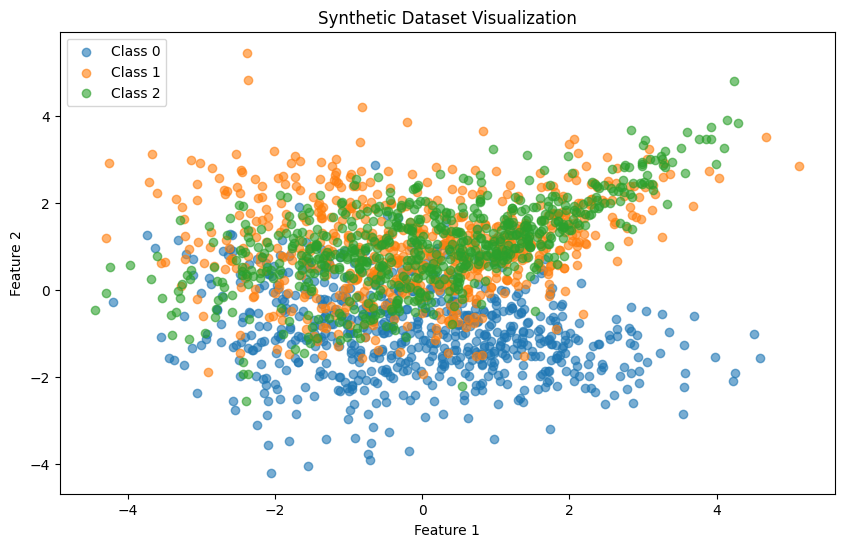

In [13]:
# Showing the class labels' distribution via scatterplot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i in range(n_classes):
    idx = y == i
    plt.scatter(X[idx, 0], X[idx, 1], label=f'Class {i}', alpha=0.6)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset Visualization')
plt.legend()
plt.show()

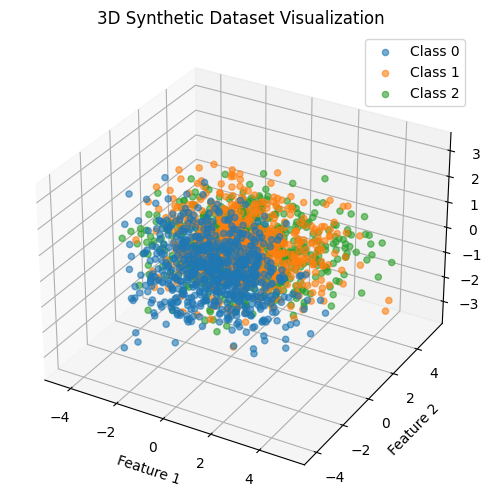

In [14]:
# Option: 3D viz
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
for i in range(n_classes):
    idx = y == i
    ax.scatter(X[idx, 0], X[idx, 1], X[idx, 2], label=f'Class {i}', alpha=0.6)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Synthetic Dataset Visualization')
ax.legend()
plt.show()

##### **Q7: How do you split the synthetic data into training and testing sets?**

In [15]:
# sklearn to the rescue again
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

print(X_train_tensor.shape)
print(y_train_tensor.shape)
print(X_test_tensor.shape)
print(y_test_tensor.shape)

torch.Size([1600, 5])
torch.Size([1600])
torch.Size([400, 5])
torch.Size([400])


## Defining the softmax classification model

##### **Q8: How do you define a simple neural network with a softmax output layer using nn.Module in PyTorch?**

In [16]:
# Define the neural network class
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # First fully connected layer
        self.fc2 = nn.Linear(hidden_size, num_classes)  # Second fully connected layer

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Apply ReLU activation function
        x = self.fc2(x)  # Second layer (no activation needed here as softmax is applied later)
        return F.log_softmax(x, dim=1)  # Apply log_softmax activation function for classification

# Parameters
input_size = X_train_tensor.shape[1]  # Number of features
hidden_size = 50  # Number of neurons in the hidden layer
num_classes = 3  # Number of output classes

# Instantiate the model
model = SimpleNN(input_size, hidden_size, num_classes)

##### **Q9: How do you initialize the weights and biases of the softmax classification model?**

In [17]:
# Define a function for weight initialization with torch.nn.init
import torch.nn.init as init

def initialize_weights(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            init.xavier_uniform_(m.weight)
            if m.bias is not None:
                init.constant_(m.bias, 0)
                
# Apply the initialization function to the model
model = SimpleNN(input_size, hidden_size, num_classes)

initialize_weights(model)

##### **Q10: How do you add hidden layers to the softmax classification model?**

In [18]:
# Define the neural network class with additional hidden layers
class ExtendedNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes):
        super(ExtendedNN, self).__init__()
        self.layers = nn.ModuleList()
        current_size = input_size
        for hidden_size in hidden_sizes:
            self.layers.append(nn.Linear(current_size, hidden_size))
            current_size = hidden_size
        self.output_layer = nn.Linear(current_size, num_classes)

    def forward(self, x):
        for layer in self.layers:
            x = F.relu(layer(x))
        x = self.output_layer(x)
        return F.log_softmax(x, dim=1)

In [19]:
# New parameters
input_size = X_train_tensor.shape[1]
hidden_sizes = [50, 30]  # Two hidden layers with 50 and 30 neurons
num_classes = 3
num_epochs = 1000
batch_size = 32

# Instantiate and initialize the model
model = ExtendedNN(input_size, hidden_sizes, num_classes)
initialize_weights(model)

## Loss function and optimizer

##### **Q11: How do you define the cross-entropy loss function in PyTorch?**

In [20]:
# Instantiate the CrossEntropyLoss class
criterion = nn.CrossEntropyLoss()

##### **Q12: How do you choose and configure an optimizer for the softmax classification model?**

In [21]:
# Main options are the same as lin reg: SGD, RMSprop and Adam
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

optimizer = optim.RMSprop(model.parameters(), lr=0.001, alpha=0.99)

optimizer = optim.Adam(model.parameters(), lr=0.001)

##### **Q13: How do you set the learning rate in the optimizer?**

In [22]:
# Just do it in the optimizer object. i.e.,
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

## Training the softmax classification model

##### **Q14: How do you create a training loop for the softmax classification model in PyTorch?**

In [24]:
# Check for CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [25]:
# Move tensors to the appropriate device
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

In [26]:
# Redefine the model
class ExtendedNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes):
        super(ExtendedNN, self).__init__()
        self.layers = nn.ModuleList()
        current_size = input_size
        for hidden_size in hidden_sizes:
            self.layers.append(nn.Linear(current_size, hidden_size))
            current_size = hidden_size
        self.output_layer = nn.Linear(current_size, num_classes)

    def forward(self, x):
        for layer in self.layers:
            x = F.relu(layer(x))
        x = self.output_layer(x)
        return x  # No need to apply log_softmax here, CrossEntropyLoss does it internally

In [27]:
# Recall the function to initialize weights
def initialize_weights(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            init.xavier_uniform_(m.weight)
            if m.bias is not None:
                init.constant_(m.bias, 0)

In [28]:
# Parameters
input_size = X_train_tensor.shape[1]
hidden_sizes = [50, 30]
num_classes = 3
num_epochs = 1000
batch_size = 32
learning_rate = 0.001

# Instantiate and initialize the model, then move to device
model = ExtendedNN(input_size, hidden_sizes, num_classes).to(device)
initialize_weights(model)

In [29]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [30]:
# Training loop
for epoch in range(num_epochs):
    permutation = torch.randperm(X_train_tensor.size()[0])
    for i in range(0, X_train_tensor.size()[0], batch_size):
        indices = permutation[i:i + batch_size]
        batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]

        # Forward pass
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.0766
Epoch [200/1000], Loss: 0.0956
Epoch [300/1000], Loss: 0.1102
Epoch [400/1000], Loss: 0.1128
Epoch [500/1000], Loss: 0.0564
Epoch [600/1000], Loss: 0.0662
Epoch [700/1000], Loss: 0.0250
Epoch [800/1000], Loss: 0.0384
Epoch [900/1000], Loss: 0.0146
Epoch [1000/1000], Loss: 0.0078


##### **Q15: How do you update the model parameters during training?**

In [31]:
# The original training loop are does so in its process of (1) performing a forward pass, (2) computing the loss, (3) doing a backward pass and (4) updating parameters in each epoch. Therefore:

# for epoch in range(num_epochs):
#     permutation = torch.randperm(X_train_tensor.size()[0])
#     for i in range(0, X_train_tensor.size()[0], batch_size):
#         indices = permutation[i:i + batch_size]
#         batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]

#         # Forward pass <- 1, 2
#         outputs = model(batch_x)
#         loss = criterion(outputs, batch_y)

#         # Backward pass and optimization <- 3, 4
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#     if (epoch + 1) % 100 == 0:
#         print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

##### **Q16: How do you calculate and print the training loss during each epoch?**

In [32]:
# See last excerpt in the training loop. i.e.,

# for epoch in range(num_epochs):
#     permutation = torch.randperm(X_train_tensor.size()[0])
#     for i in range(0, X_train_tensor.size()[0], batch_size):
#         indices = permutation[i:i + batch_size]
#         batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]

#         # Forward pass <- 1, 2
#         outputs = model(batch_x)
#         loss = criterion(outputs, batch_y)

#         # Backward pass and optimization <- 3, 4
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#     if (epoch + 1) % 100 == 0:
#         print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}') # <- here!

##### **Q17: How do you visualize the training loss over epochs using `matplotlib`?**

In [33]:
# Reinstantiate the model
model = ExtendedNN(input_size, hidden_sizes, num_classes).to(device)
initialize_weights(model)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [34]:
# Initialize a list to store the loss values
loss_values = []

# Modify the training loop
for epoch in range(num_epochs):
    permutation = torch.randperm(X_train_tensor.size()[0])
    for i in range(0, X_train_tensor.size()[0], batch_size):
        indices = permutation[i:i + batch_size]
        batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]

        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss_values.append(loss.item())  # Store the loss value

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.1654
Epoch [200/1000], Loss: 0.2477
Epoch [300/1000], Loss: 0.1232
Epoch [400/1000], Loss: 0.1275
Epoch [500/1000], Loss: 0.0798
Epoch [600/1000], Loss: 0.0176
Epoch [700/1000], Loss: 0.0534
Epoch [800/1000], Loss: 0.0402
Epoch [900/1000], Loss: 0.0072
Epoch [1000/1000], Loss: 0.0025


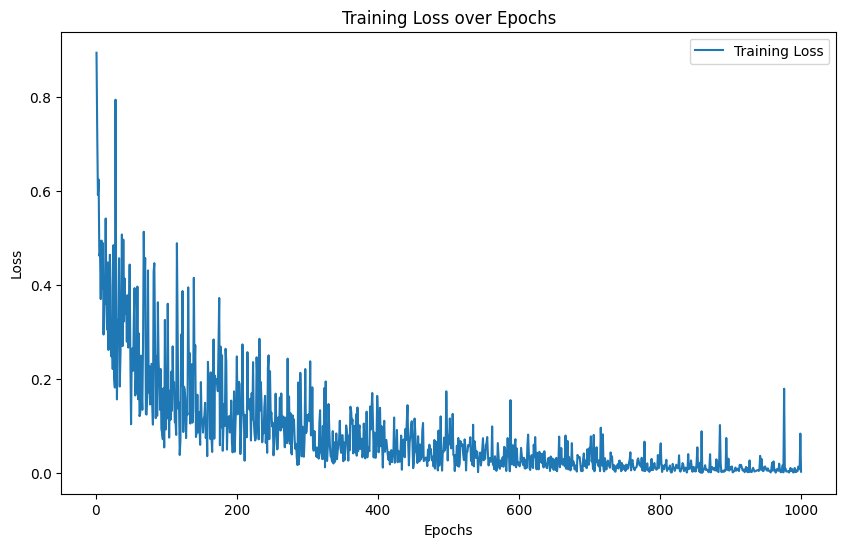

In [35]:
# Plot the training loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

In [36]:
# Bonus: Evaluate the model
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)

print(f'Accuracy of the model on the test set: {accuracy * 100:.2f}%')

Accuracy of the model on the test set: 84.50%


##### **Q18: How do you implement batch training for the softmax classification model?**

In [37]:
# Create a TensorDataset and DataLoader for batching
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
batch_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [38]:
# Reinitiate the model
input_size = X_train_tensor.shape[1]
hidden_sizes = [50, 30]
num_classes = 3
num_epochs = 1000
learning_rate = 0.001

model = ExtendedNN(input_size, hidden_sizes, num_classes).to(device)
initialize_weights(model)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [39]:
# Training loop
loss_values = []

for epoch in range(num_epochs):
    for batch_x, batch_y in train_loader:
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss_values.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.1086
Epoch [200/1000], Loss: 0.0624
Epoch [300/1000], Loss: 0.0206
Epoch [400/1000], Loss: 0.0252
Epoch [500/1000], Loss: 0.0177
Epoch [600/1000], Loss: 0.0176
Epoch [700/1000], Loss: 0.0418
Epoch [800/1000], Loss: 0.0418
Epoch [900/1000], Loss: 0.0027
Epoch [1000/1000], Loss: 0.0040


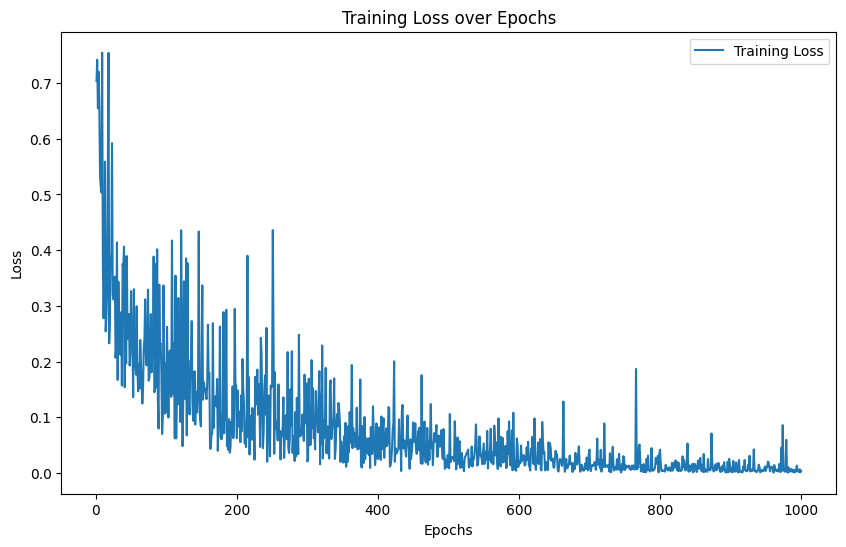

In [40]:
# Plot the training loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

In [41]:
# Evaluate the model
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)

print(f'Accuracy of the model on the test set: {accuracy * 100:.2f}%')

Accuracy of the model on the test set: 85.75%


## Evaluating the model

##### **Q19: How do you make predictions using your trained softmax classification model?**

In [42]:
# Set the model to evaluation mode
# model.eval()  # already done so

# No gradient calculation needed during inference
with torch.no_grad():
    # Get raw model outputs (logits)
    logits = model(X_test_tensor)
    
    # Apply softmax to get probabilities
    probabilities = F.softmax(logits, dim=1)
    
    # Get the predicted class (index of the max probability)
    _, predicted_classes = torch.max(probabilities, 1)

# Print the first 10 predictions
print(predicted_classes[:10])

# Evaluate the model
accuracy = (predicted_classes == y_test_tensor).sum().item() / y_test_tensor.size(0)
print(f'Accuracy of the model on the test set: {accuracy * 100:.2f}%')

tensor([1, 0, 0, 2, 0, 1, 0, 2, 0, 1], device='cuda:0')
Accuracy of the model on the test set: 85.75%


##### **Q20: How do you calculate accuracy and other performance metrics for your model?**

##### **Q21: How do you visualize the model's predictions against the actual class labels?**

##### **Q22: How do you create a confusion matrix to evaluate the performance of your classification model?**

##### **Q23: How do you calculate precision, recall, and F1 score for your model?**

## Saving and loading the model

##### **Q24: How do you save the trained softmax classification model in PyTorch?**

##### **Q25: How do you load a saved softmax classification model in PyTorch?**

##### **Q26: How do you save and load the model's state dictionary in PyTorch?**

## Optimizations

##### **Q27: How do you perform hyperparameter tuning to improve the performance of your softmax classification model?**

##### **Q28: How do you implement dropout regularization in your model to prevent overfitting?**

##### **Q29: How do you use learning rate scheduling to adjust the learning rate during training?**

##### **Q30: How do you use weight decay to regularize the model and prevent overfitting?**

##### **Q31: How do you implement early stopping to prevent overfitting during training?**

## Handling real-world data

##### **Q32: How do you preprocess a real-world dataset for softmax classification in PyTorch?**

##### **Q33: How do you handle missing data in your dataset before training the model?**

##### **Q34: How do you encode categorical variables for use in a softmax classification model?**

##### **Q35: How do you split a real-world dataset into training, validation, and test sets?**

##### **Q36: How do you train your softmax classification model on a real-world dataset?**

##### **Q37: How do you evaluate your model's performance on a real-world dataset?**

##### **Q38: How do you handle imbalanced classes in a real-world dataset?**

## Conclusion

## Further exercises

##### **Q39: How do you implement a softmax function from scratch without using PyTorch's built-in functions?**

##### **Q40: How do you experiment with different neural network architectures to see their impact on classification performance?**

##### **Q41: How do you apply transfer learning to a softmax classification problem using a pre-trained model?**

##### **Q42: How do you visualize the learned features of your model using techniques such as t-SNE or PCA?**

##### **Q43: How do you perform data augmentation on your training dataset to improve the robustness of your classification model?**